In [1]:
from keras_segmentation.models import unet
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import re
import glob
from utils_segmentation import *
import numpy as np

Using TensorFlow backend.
/home/vasylcf/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vasylcf/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vasylcf/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vasylcf/anaconda3/lib/python3.7/site-packages/t

In [2]:
data = pd.read_csv('data_stat_segm.csv')
data.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,bbox_x3,bbox_y3,bbox_x4,bbox_y4,labels,fname,img_type
0,47,239,1280,273,1280,418,38,377,1,img00.jpg,1
1,687,415,1280,428,1280,882,675,873,2,img00.jpg,1
2,353,109,3465,141,3489,481,345,481,1,img01.jpg,1
3,2017,521,3493,521,3569,1633,2045,1701,2,img01.jpg,1
4,121,673,3869,633,3909,1057,105,1117,1,img02.jpg,1


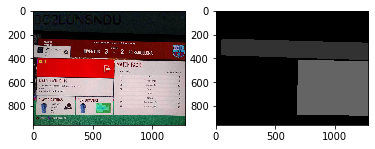

In [3]:
f_name = 'data/img00.jpg'
m_name = 'annotations_stat_segm/img00.png'
img = cv2.imread(f_name)
msk = cv2.imread(m_name)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(msk*50)

## Create dataset

In [4]:
images = glob.glob('images_train__stat_segm/*.png')
annotations = glob.glob('annotations_train__stat_segm/*.png')
#augmentation_images(images,annotations)

## Model

In [5]:
from keras_segmentation.models import unet

In [6]:
model = unet.mobilenet_unet(n_classes=4, input_height=224, input_width=224,)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# model.train(
#     train_images =  "images_train__stat_segm/",
#     train_annotations = "annotations_train__stat_segm/",
#     validate = True,
#     val_images = "validation__stat_segm/",
#     val_annotations = "annotation_validation__stat_segm/",
#     epochs=5
# )

In [8]:
# model.save('segm_mob_224_224__stat_segm.h5')

In [9]:
model.load_weights('segm_mob_224_224__stat_segm.h5')

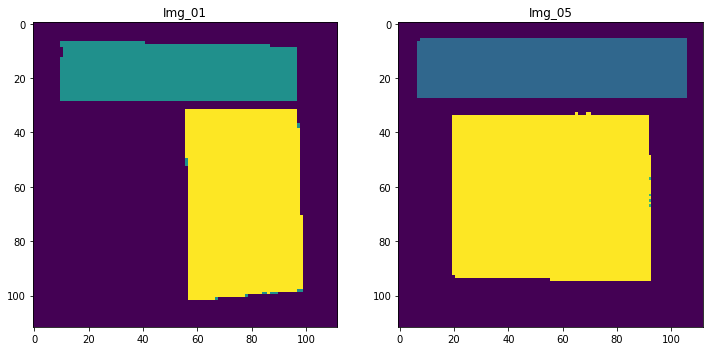

In [10]:
out_1 = model.predict_segmentation(inp="images_train__stat_segm/img01.png")
out_2 = model.predict_segmentation(inp="images_train__stat_segm/img05.png")
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Img_01')
plt.imshow(out_1)
plt.subplot(1,2,2)
plt.title('Img_05')
plt.imshow(out_2)

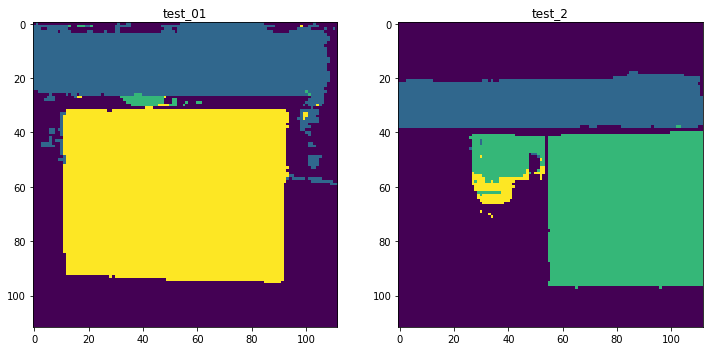

In [11]:
test_1 = model.predict_segmentation(inp="test_img/mob_test_1.png")
test_2 = model.predict_segmentation(inp="test_img/mob_test_2.png")
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('test_01')
plt.imshow(test_1)
plt.subplot(1,2,2)
plt.title('test_2')
plt.imshow(test_2)

## Test IOU

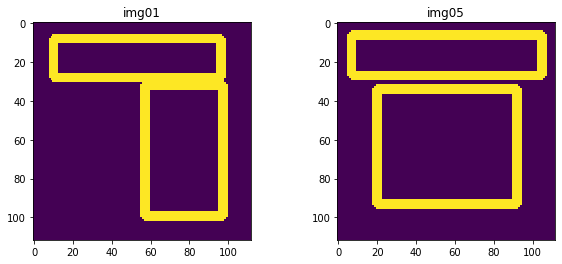

In [12]:
plt.figure(figsize=(10,4))
segments = find_segments(out_1,[1,2])
m = np.zeros(out_1.shape)
for s in segments:
    cv2.rectangle(m,*segments[s],(255,255,0),3)

plt.subplot(1,2,1)
plt.title('img01')
plt.imshow(m)

segments = find_segments(out_2,[1,3])
m = np.zeros(out_1.shape)
for s in segments:
    cv2.rectangle(m,*segments[s],(255,255,0),3)

plt.subplot(1,2,2)
plt.title('img05')
plt.imshow(m)

Find segments: 2


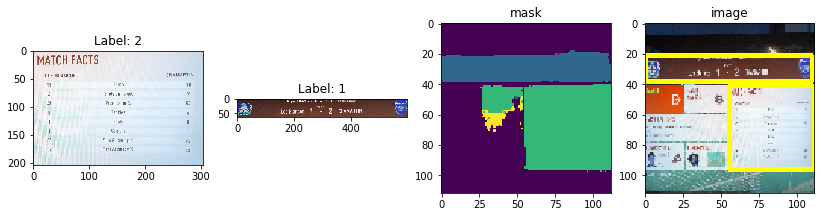

In [13]:
#test_img/mob_test_2.png"
msk = analysis(f='test_2.png',model=model, path='test_img/')

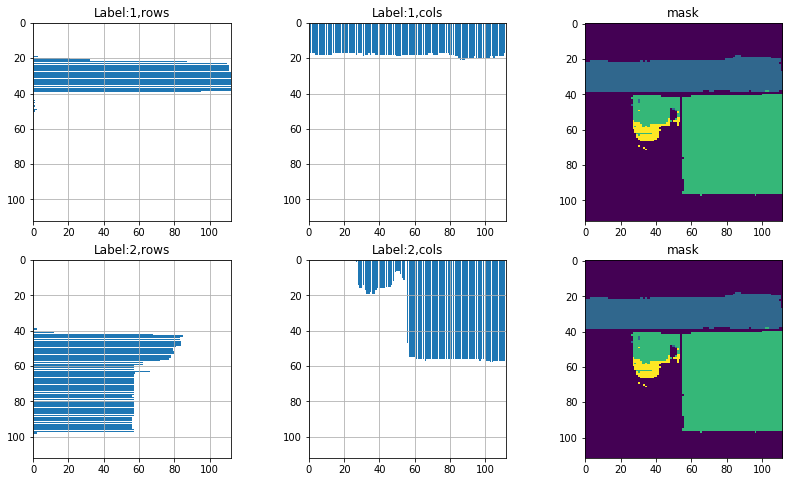

In [14]:
build_hist(test_2,[1,2])

In [15]:
test_data = pd.read_csv('test_labeled_dataset/data_test_stat_segm.csv')
test_data = test_data.rename(columns={'class':'labels'})
test_data['img_type'] = test_data['fname'].apply(lambda x: 1 if int(re.findall(r'\d+',x.split('.')[0])[0])<11 else 2)
test_data['fname'] = test_data['fname'].apply(lambda x: x[3:])
test_data.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,bbox_x3,bbox_y3,bbox_x4,bbox_y4,labels,fname,img_type
0,87,20,1190,0,1195,113,81,138,1,01.jpg,1
1,614,142,1196,125,1222,564,611,558,2,01.jpg,1
2,173,195,1900,203,1927,395,159,391,1,02.jpg,1
3,1071,419,1927,419,2011,1090,1075,1105,2,02.jpg,1
4,485,165,3769,177,3745,581,509,541,1,03.jpg,1


In [16]:
#let's create annotations
img_folder = 'test_labeled_dataset/data/'
annotation_folder = 'test_labeled_dataset/annotations_test_stat_segm/'
#create_annotations(test_data,img_folder, annotation_folder)

In [17]:
IOUs = IOU_list_files(test_data,model,img_folder='test_labeled_dataset/data/',
                   annotation_folder = 'test_labeled_dataset/annotations_test_stat_segm/',n_classes=2,
                  size=(224,224))
IOUs

{'01.jpg': {1: 0.67305559738784, 2: 0.7714203910811995},
 '02.jpg': {1: 0.9398431474110315, 2: 0.9136224760892667},
 '03.jpg': {1: 0.8603979741689629, 2: 0.9279044567756667},
 '04.jpg': {1: 0.905405883591443, 2: 0.9259117238413368},
 '05.jpg': {1: 0.8529972606868829, 2: 0.9481666070449555},
 '06.jpg': {1: 0.8841021658029768, 2: 0.8316608532331634},
 '07.jpg': {1: 0.6043495963006292, 2: 0.9031346411789024},
 '08.jpg': {1: 0.853271651045306, 2: 0.9190179208285542},
 '09.jpg': {1: 0.4433644571644717, 2: 0.9271348428018377},
 '10.jpg': {1: 0.7863960347854027, 2: 0.9493556663520195},
 '11.jpg': {1: 0.9247011509051084, 3: 0.941528657700715},
 '12.jpg': {1: 0.7410323709536308, 3: 0.8389877305906918},
 '13.jpg': {1: 0.7792466672716198, 3: 0.9257819187263611},
 '14.jpg': {1: 0.9081967127344263, 3: 0.9514743333995961},
 '15.jpg': {1: 0.6535957015265275, 3: 0.8717152621288298},
 '16.jpg': {1: 0.915505290428288, 3: 0.9313957281928797},
 '17.jpg': {1: 0.7358153975688049, 3: 0.8479803268284943},
 '1

In [18]:
ACC = pd.DataFrame.from_dict(IOUs, orient='index')
ACC.mean()

1    0.802202
2    0.901733
3    0.915733
dtype: float64

## low accuracy

Find segments: 2


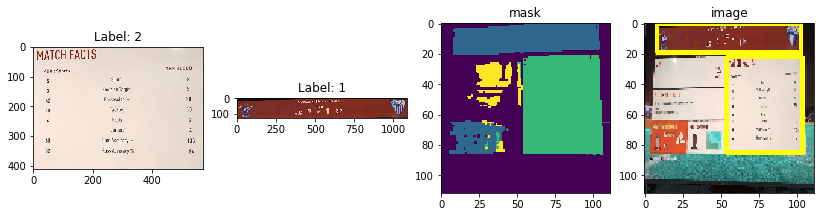

In [19]:
msk = analysis(f='01.jpg', model=model)

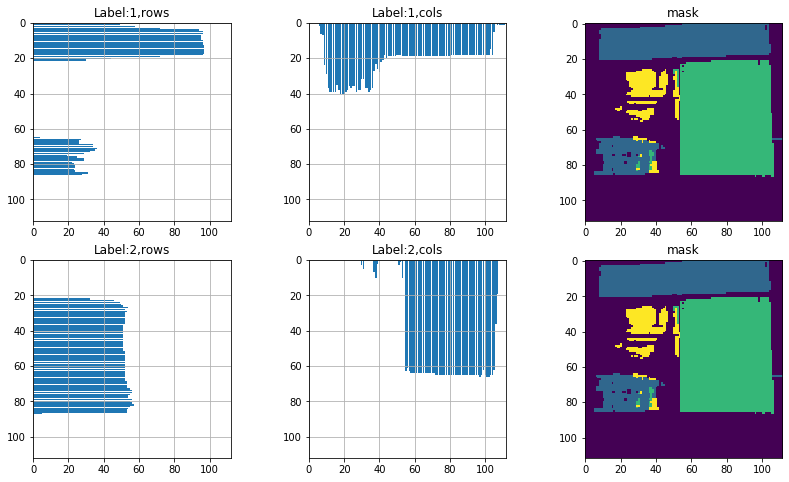

In [20]:
build_hist(msk,[1,2])

In [ ]:
low_acc_samples = ['01.jpg', '09.jpg']
